In [24]:
import pandas as pd
import networkx as nx
import json

data = pd.read_csv("/Users/nareshnarla/Desktop/majass3/data_scopus.csv")
data=data.fillna(0)
data.head()


,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,0,0,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,0,0,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,0,0,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,0.0
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,0,0,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,0.0
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,0,0,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,0.0


In [28]:
graph = nx.Graph()

for _, row in data.iterrows():
    author_list = row['Authors'].split(', ')
    publication_id = row['EID']
    
    for a in range(len(author_list)):
        for b in range(a + 1, len(author_list)):
            graph.add_edge(author_list[a], author_list[b], publication=publication_id)

network_data = nx.readwrite.json_graph.node_link_data(graph)

file_path = "network.json"

with open(file_path, 'w') as file:
    json.dump(network_data, file, indent=2)

print(f"Network data successfully exported to JSON: {file_path}")



Network data successfully exported to JSON: network.json


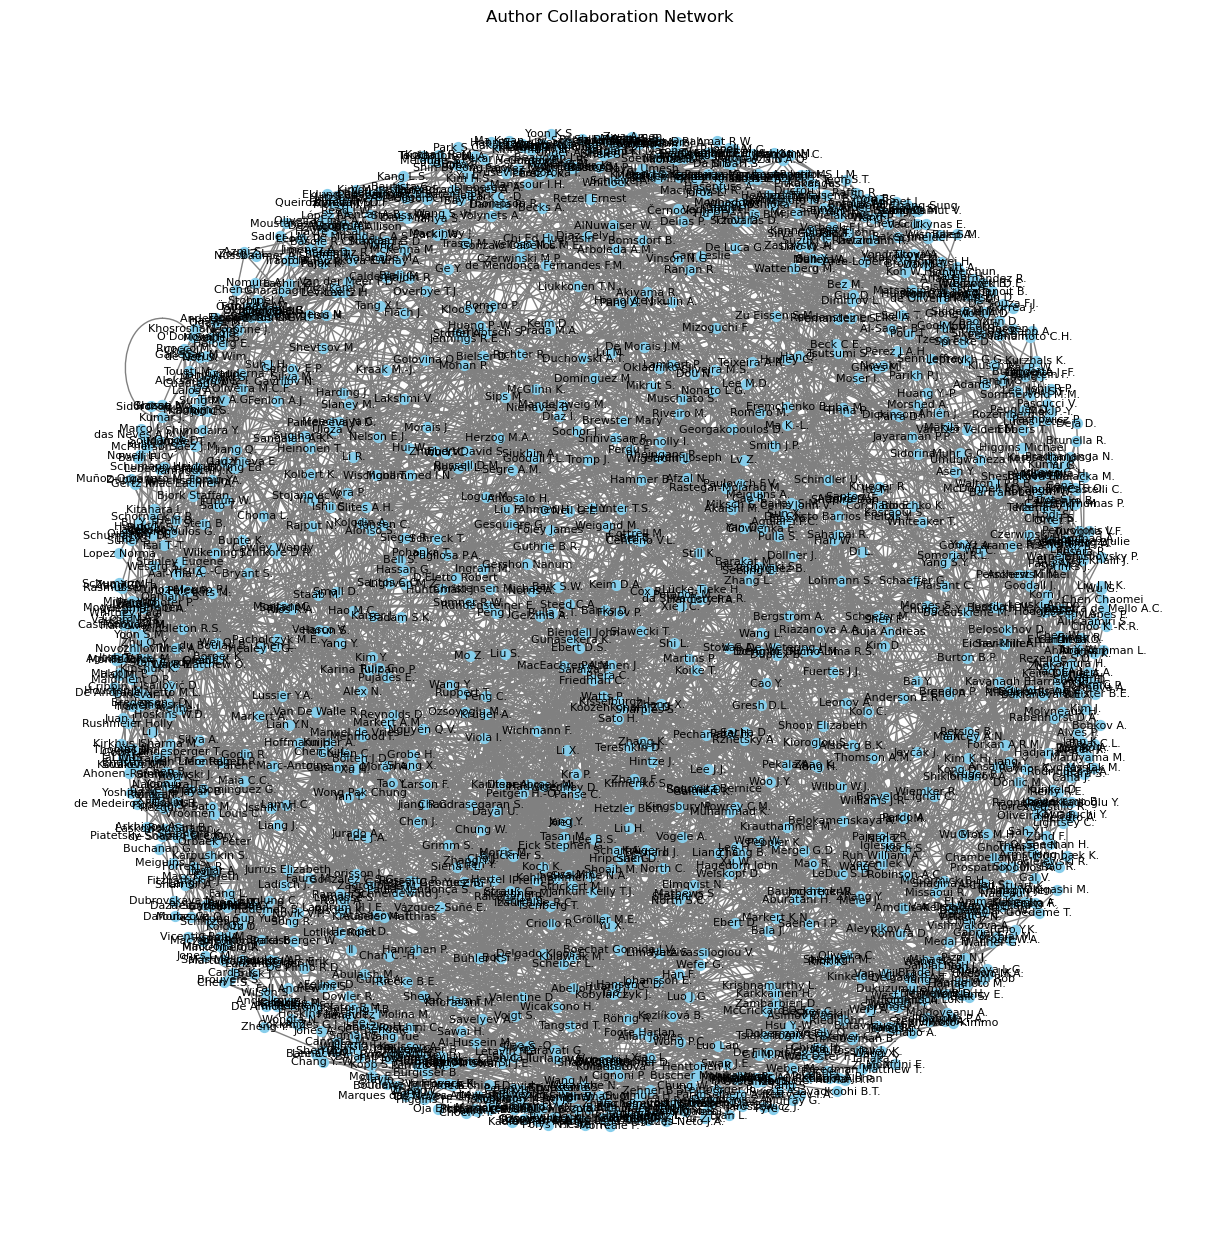

In [30]:
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph

with open("/Users/nareshnarla/Desktop/majass3/network.json") as file:
    network_data = json.load(file)

graph = json_graph.node_link_graph(network_data)

plt.figure(figsize=(12, 12))
positions = nx.spring_layout(graph, k=0.5)
nx.draw(
    graph, 
    positions, 
    with_labels=True, 
    node_size=50, 
    font_size=8, 
    edge_color="gray", 
    node_color="skyblue"
)
plt.title("Author Collaboration Network")
plt.show()


In [32]:
data['Affiliation Country'] = data['Authors with affiliations'].apply(
    lambda x: x.split(', ')[-1] if x != 0 else 0
)

top_countries = data['Affiliation Country'].value_counts().nlargest(10).index.tolist()
top_countries


['United States',
 'Germany',
 'United Kingdom',
 'South Korea',
 'China',
 'Canada',
 'Russian Federation',
 'Japan',
 'Brazil',
 'Australia']

In [34]:
import matplotlib.colors as mcolors

color_mapping = {country: color for country, color in zip(top_countries, plt.cm.tab10.colors)}
fallback_color = "#A9A9A9"
